# Homework 04: Hadoop for Fun and for Profit
**Author:** João Victor Quintanilha  
**Date:** 2024-11-12

<br>

# PART 1: Setup

## Step 1
First, we install the necessary libraries and mount Google Drive to store and retrieve data.

In [ ]:
try:
    import twelvedata
except ModuleNotFoundError:
    !pip install twelvedata[pandas,matplotlib,plotly,websocket-client]
    import twelvedata

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 1.7 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive')

## Step 2: Checking API Key File
Verify if the API key file exists in the specified Google Drive directory:

In [ ]:
import os
print(os.listdir('/content/drive/MyDrive'))

['Getting started.pdf', 'keys.py', 'Colab Notebooks', '__pycache__', 'AAPL_4_years_data.csv', 'MSFT_4_years_data.csv', 'IBM_4_years_data.csv', 'AAPL_4_years_data.gsheet', 'IBM_4_years_data.gsheet', 'MSFT_4_years_data.gsheet', 'AAPL_signals.csv', 'MSFT_signals.csv', 'IBM_signals.csv', 'stock_data_hash.txt']


It seems to be working, which allows us to finally trying to import our API key:

In [ ]:
from keys import twelveDataKey as api_key
# print(api_key)  # To confirm the key loads
if (api_key):
  print("Key was successfully accessed. It is not printed here to avoid losing 10 points.")

Key was successfully accessed. It is not printed here to avoid losing 10 points.


## Step 3: Initialize Twelve Data Client
Initialize the Twelve Data API client for fetching stock data:

In [ ]:
from twelvedata import TDClient

# Initialize the twelveData client
td = TDClient(apikey=api_key)

## Step 4: Function to Fetch Data
We define a function to fetch stock data at 15-minute intervals within specified timeframes.
- We specify the 6-month time chunks and stock symbols to track.
- Fetch the data for each stock and save it as CSV files

In [ ]:
!pip install pandas
import pandas as pd # import pandas and assign it to the alias 'pd'


# Define the timeframes for data collection
timeframes = [
    ("2024-05-15", "2024-11-15"),
    ("2023-11-15", "2024-05-15"),
    ("2023-05-15", "2023-11-15"),
    ("2022-11-15", "2023-05-15"),
    ("2022-05-15", "2022-11-15"),
    ("2021-11-15", "2022-05-15"),
    ("2021-05-15", "2021-11-15"),
    ("2020-11-15", "2021-05-15"),
]

# Define the stocks to track
symbols = ["AAPL", "MSFT", "IBM"]


# Function to fetch data
def fetch_data(symbol, start_date, end_date, interval="15min"):
    """
    Fetch stock data for a given symbol within a specified date range.
    - symbol: Stock symbol (e.g., 'AAPL')
    - start_date, end_date: Date range (YYYY-MM-DD)
    - interval: Data interval (default: '15min')
    """
    ts = td.time_series(
        symbol=symbol,
        interval=interval,
        start_date=start_date,
        end_date=end_date,
        outputsize=5000,  # Maximum data points per request
        timezone="America/New_York"
    )
    return ts.as_pandas()

## Step 5: Processing Data

Here we **collect Data for AAPL, MSFT, and IBM**

Fetch data for each stock and store it in a dictionary or individual DataFrames.


In [ ]:
import time

# Fetch and save data for each timeframe
for symbol in symbols:
    print(f"Starting data collection for {symbol}")
    all_data = []
    for start_date, end_date in timeframes:
        print(f"Fetching data for {symbol} from {start_date} to {end_date}")
        try:
            data = fetch_data(symbol, start_date, end_date)
            all_data.append(data)
            # Respect rate limits with a delay between requests
            time.sleep(8)  # Wait 8 seconds to stay within limits
        except Exception as e:
            print(f"Error fetching data for {symbol} from {start_date} to {end_date}: {e}")
            # If rate limit is exceeded, wait for 1 minute and retry
            if "run out of API credits" in str(e):
                print("Rate limit hit. Waiting for 1 minute before retrying...")
                time.sleep(60)
    # Combine all the chunks into a single DataFrame
    if all_data:
        combined_data = pd.concat(all_data)
        combined_data.to_csv(f"/content/drive/MyDrive/{symbol}_4_years_data.csv")
        print(f"Data for {symbol} saved to /content/drive/MyDrive/{symbol}_4_years_data.csv")
    else:
        print(f"No data collected for {symbol}")

Starting data collection for AAPL
Fetching data for AAPL from 2024-05-15 to 2024-11-15
Fetching data for AAPL from 2023-11-15 to 2024-05-15
Fetching data for AAPL from 2023-05-15 to 2023-11-15
Fetching data for AAPL from 2022-11-15 to 2023-05-15
Fetching data for AAPL from 2022-05-15 to 2022-11-15
Fetching data for AAPL from 2021-11-15 to 2022-05-15
Fetching data for AAPL from 2021-05-15 to 2021-11-15
Fetching data for AAPL from 2020-11-15 to 2021-05-15
Data for AAPL saved to /content/drive/MyDrive/AAPL_4_years_data.csv
Starting data collection for MSFT
Fetching data for MSFT from 2024-05-15 to 2024-11-15
Fetching data for MSFT from 2023-11-15 to 2024-05-15
Fetching data for MSFT from 2023-05-15 to 2023-11-15
Fetching data for MSFT from 2022-11-15 to 2023-05-15
Fetching data for MSFT from 2022-05-15 to 2022-11-15
Fetching data for MSFT from 2021-11-15 to 2022-05-15
Fetching data for MSFT from 2021-05-15 to 2021-11-15
Fetching data for MSFT from 2020-11-15 to 2021-05-15
Data for MSFT sa

## Step 6: Analysis and Visualization of the Data
We perform data cleaning and analysis to calculate moving averages and identify buy/sell signals.

Processing AAPL...
Missing values for AAPL:
datetime    0
open        0
high        0
low         0
close       0
volume      0
dtype: int64
Timeframe for AAPL: 2020-11-16 09:30:00 to 2024-11-14 15:45:00
Signals saved to /content/drive/MyDrive/AAPL_signals.csv


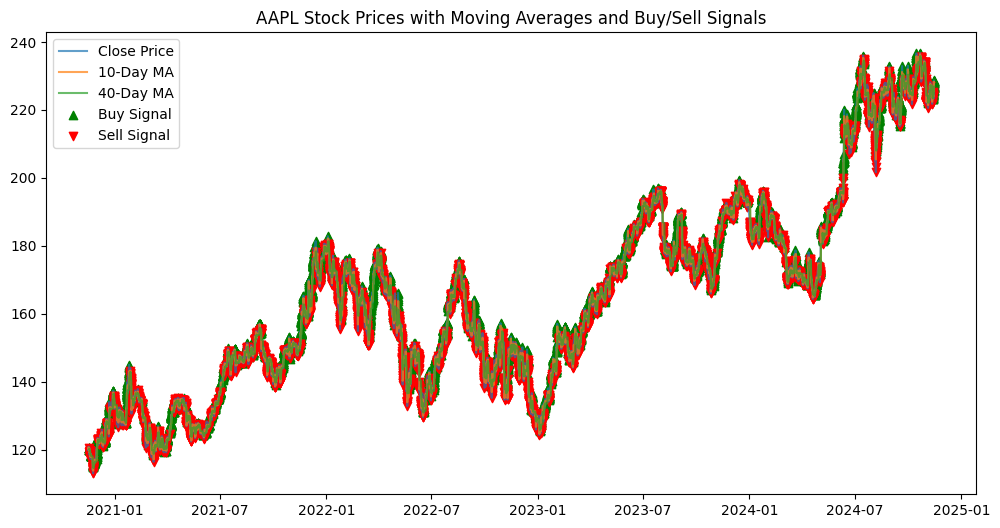

Processing MSFT...
Missing values for MSFT:
datetime    0
open        0
high        0
low         0
close       0
volume      0
dtype: int64
Timeframe for MSFT: 2020-11-16 09:30:00 to 2024-11-14 15:45:00
Signals saved to /content/drive/MyDrive/MSFT_signals.csv


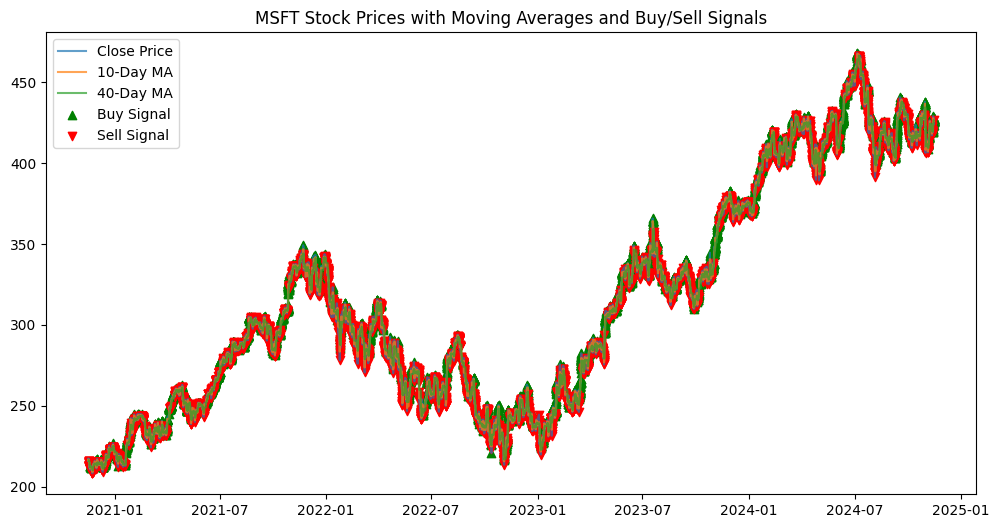

Processing IBM...
Missing values for IBM:
datetime    0
open        0
high        0
low         0
close       0
volume      0
dtype: int64
Timeframe for IBM: 2020-11-16 09:30:00 to 2024-11-14 15:45:00
Signals saved to /content/drive/MyDrive/IBM_signals.csv


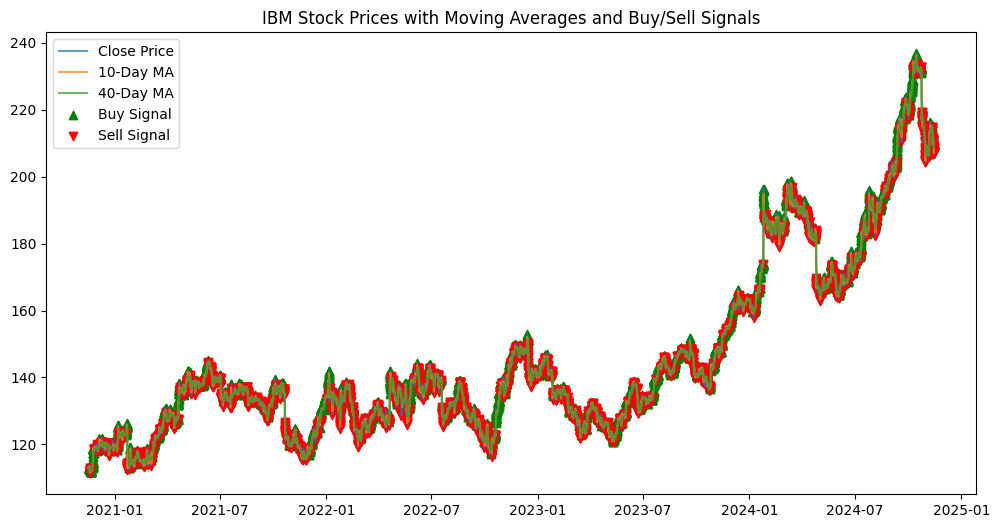

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# List of stock files and corresponding output file names
stocks = [
    {"input": "/content/drive/MyDrive/AAPL_4_years_data.csv", "output": "/content/drive/MyDrive/AAPL_signals.csv", "name": "AAPL"},
    {"input": "/content/drive/MyDrive/MSFT_4_years_data.csv", "output": "/content/drive/MyDrive/MSFT_signals.csv", "name": "MSFT"},
    {"input": "/content/drive/MyDrive/IBM_4_years_data.csv", "output": "/content/drive/MyDrive/IBM_signals.csv", "name": "IBM"}
]

for stock in stocks:
    print(f"Processing {stock['name']}...")

    # Load the CSV file
    data = pd.read_csv(stock["input"])

    # Check for missing values
    print(f"Missing values for {stock['name']}:")
    print(data.isnull().sum())

    # Ensure the data spans the required timeframes
    print(f"Timeframe for {stock['name']}: {data['datetime'].min()} to {data['datetime'].max()}")

    # Remove duplicates if necessary
    data = data.drop_duplicates()

    # Convert datetime column to pandas datetime
    data['datetime'] = pd.to_datetime(data['datetime'])

    # Sort by datetime
    data = data.sort_values('datetime')

    # Calculate 10-day and 40-day moving averages
    data['MA_10'] = data['close'].rolling(window=10).mean()
    data['MA_40'] = data['close'].rolling(window=40).mean()

    # Identify buy/sell signals
    data['signal'] = 'hold'
    data.loc[data['MA_10'] > data['MA_40'], 'signal'] = 'buy'
    data.loc[data['MA_10'] < data['MA_40'], 'signal'] = 'sell'

    # Save the signals to a new CSV file
    data.to_csv(stock["output"], index=False)
    print(f"Signals saved to {stock['output']}")

    # Plot stock prices, moving averages, and buy/sell signals
    plt.figure(figsize=(12, 6))
    plt.plot(data['datetime'], data['close'], label='Close Price', alpha=0.7)
    plt.plot(data['datetime'], data['MA_10'], label='10-Day MA', alpha=0.7)
    plt.plot(data['datetime'], data['MA_40'], label='40-Day MA', alpha=0.7)

    # Highlight buy/sell signals
    buy_signals = data[data['signal'] == 'buy']
    sell_signals = data[data['signal'] == 'sell']

    plt.scatter(buy_signals['datetime'], buy_signals['close'], label='Buy Signal', marker='^', color='green')
    plt.scatter(sell_signals['datetime'], sell_signals['close'], label='Sell Signal', marker='v', color='red')

    plt.title(f'{stock["name"]} Stock Prices with Moving Averages and Buy/Sell Signals')
    plt.legend()
    plt.show()


## Step 7: Merge and wrap-up data
Now, we will need to merge and finalize the work with this dataset.

### Step 7.1: Define hex function

In [ ]:
def df_hexdigest(saved_df):
    '''
        saved_df should be a dataframe with columns ['datetime', 'open', 'high', 'low', 'close', 'volume', 'Symbol']
        and with all data points between 2020-01-01 and 2024-06-30 (both dates inclusive), for  AAPL, MSFT and IBM.
    '''

    # Convert 'datetime' column to datetime objects if it's not already
    import pandas as pd

    saved_df['datetime'] = pd.to_datetime(saved_df['datetime'])

    # Sort the DataFrame by the 'datetime' column
    saved_df = saved_df.sort_values('datetime')

    # Display the sorted DataFrame (optional)
    # print(saved_df)
    saved_df = saved_df.reset_index(drop=True)
    saved_df

    df_filtered = saved_df[(saved_df['datetime'] >= '2020-01-01') & (saved_df['datetime'] <= '2024-06-30')]
    df_filtered

    # Sort the DataFrame by the 'datetime' column
    df_filtered_sorted = df_filtered.sort_values('datetime')

    df_filtered_sorted = df_filtered_sorted.reset_index(drop=True)
    df_filtered_sorted.head()

    df_filtered_sorted_deduped = df_filtered_sorted.drop_duplicates(subset=['datetime', 'open', 'high', 'low', 'close', 'volume', 'Symbol'], keep='first')

    printed_string = df_filtered_sorted_deduped[['datetime', 'Symbol']].to_string(index=False, header=False)
    # print(printed_string[:2000])
    import hashlib
    md5_hash = hashlib.md5(printed_string.encode()) # Use hashlib.md5() to create the hash object
    return md5_hash.hexdigest()

### Step 7.2: Prepare the 3 datasets for `hexdigest(saved_df)`

In [ ]:
# List of stock files with their corresponding symbols
stocks = [
    {"file": "/content/drive/MyDrive/AAPL_4_years_data.csv", "symbol": "AAPL"},
    {"file": "/content/drive/MyDrive/MSFT_4_years_data.csv", "symbol": "MSFT"},
    {"file": "/content/drive/MyDrive/IBM_4_years_data.csv", "symbol": "IBM"}
]

# Initialize an empty list to store DataFrames
dataframes = []

# Load each dataset, add the Symbol column, and append it to the list
for stock in stocks:
    df = pd.read_csv(stock["file"])
    df['Symbol'] = stock["symbol"]  # Add the Symbol column
    dataframes.append(df)

# Concatenate all DataFrames into a single DataFrame
merged_df = pd.concat(dataframes, ignore_index=True)

### Step 7.3: Generate and Store hash value

In [ ]:
# Generate and print the hash value
hash_value = df_hexdigest(merged_df)
print("Generated Hash Value:", hash_value)

# Save the hash value to a .txt file in Google Drive
hash_file_path = "/content/drive/MyDrive/stock_data_hash.txt"
with open(hash_file_path, "w") as hash_file:
    hash_file.write(hash_value)

print(f"Hash value saved to {hash_file_path}")


Generated Hash Value: 57b3a52a72185f114cd6fd357ee064c7
Hash value saved to /content/drive/MyDrive/stock_data_hash.txt



# PART 2: Algorithmic Stock Trading

## Question 07. If you had to buy 1,000,000 shares of a stock without letting the market know, list some strategies you might use. Be as specific as possible: “I would break up the order into manageable chunks” wouldn’t get you much credit. Search, research, and then answer.


To buy 1,000,000 shares of a stock without alerting the market, institutional traders use strategies that conceal the order size and intent. Here are some effective methods based on industry practices:

1. **Iceberg Orders**: Iceberg orders allow traders to show only a small portion of the order at a time, hiding the rest beneath the surface. As the visible part is executed, the order automatically replenishes from the hidden reserve until the full order is completed. This method minimizes the price impact and the risk of others reacting to a large buyer in the market (Exegy, 2024; Bessembinder et al., 2009).

2. **Block Trades**: Block trades involve large, privately negotiated trades that are conducted away from public exchanges. Typically, these transactions involve at least 10,000 shares or significant dollar amounts. Executing block trades privately prevents large orders from moving the market price. These trades are often facilitated by brokers who may break them into smaller parts to avoid drawing attention (Chen, 2024).

3. **Dark Pools**: Dark pools are private trading venues where large institutional trades can be executed anonymously, thus avoiding public scrutiny that could influence prices. Dark pools enable large orders to match with liquidity without alerting the market, reducing the chance of adverse price movements (Bessembinder et al., 2009).

4. **Liquidity-Seeking Algorithms**: These algorithms monitor real-time market liquidity and execute small portions of the large order where liquidity is high, blending in with natural market activity. This approach reduces the likelihood of other market participants detecting a large order (Exegy, 2024).

5. **Synthetic Icebergs**: For exchanges that don’t offer iceberg orders, brokers can create synthetic versions by breaking down large orders into smaller segments. This method uses the trading platform’s routing logic to distribute orders across multiple exchanges, minimizing detection and response from other market players (Exegy, 2024).

These strategies help institutional traders manage large positions while minimizing market impact, achieving efficient execution without triggering significant price movements.

---

### References
- Exegy, "Hiding (and Seeking) Liquidity With Iceberg Orders," 2024.
- Bessembinder, H., Panayides, M., & Venkataraman, K., "Hidden liquidity: An analysis of order exposure strategies in electronic stock markets," *Journal of Financial Economics*, 2009.
- Chen, J., "Block Trade: Definition, How It Works, and Example," Investopedia, 2024.

## Question 08.  If you had to figure out if someone was “dumping” a large quantity of stocks, how would you do it? What parameters, over what period of time?

If tasked with detecting whether a large quantity of stock is being dumped, the goal is to identify patterns that could indicate sudden or systematic selling activity. Large-scale dumping often results in notable market changes and is typically executed in smaller chunks across multiple brokers to avoid detection. Below are methods to analyze this behavior:

---

#### **1. Spikes and Dips**
- **Unusual Volume Spikes**:  
   - Collect historical trading volume data across different time frames (e.g., daily, weekly, monthly).
   - Establish a "normal" baseline of trading volume for a given stock.
   - Monitor for anomalies that deviate significantly from this baseline during regular market hours.

- **Bid-Ask Imbalances**:  
   - Sudden surges in sell orders or a lack of corresponding buyers can be an indicator of dumping.
   - A **widening bid-ask spread** might suggest that market makers are withdrawing from the market, wary of being caught on the wrong side of a large sell-off.
   - Analyzing bid-ask trends can provide insight into potential dumping behavior.

---

#### **2. Cluster Analysis**
- Identify a clustering of large sell orders over short periods.
- Pay attention to orders executed through multiple trading venues or brokers, as this is a common strategy to obscure dumping activity.
- Use clustering algorithms (e.g., K-Means, DBSCAN) to detect patterns in sell order data, focusing on:
   - **Timing**: Orders placed within narrow time windows.
   - **Magnitude**: Abnormally high transaction sizes compared to typical market behavior.

---

By leveraging these approaches, we can systematically track and identify indicators of stock dumping. Both **spikes and dips** and **cluster analysis** provide complementary insights into abnormal trading behaviors that may signify large-scale stock selling.


# PART 3: Technical Analysis of Stock Trading

## Question 10. Create a similar program new-stock-price-feeder.py that uses a more modern API (e.g., twelveData) instead.

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import pandas as pd
import time
import sys
import pathlib

# Load stock price data from pre-downloaded CSV files
apple_stock_data = pd.read_csv('AAPL_4_years_data.csv')
microsoft_stock_data = pd.read_csv('MSFT_4_years_data.csv')

# Add a 'Symbol' column to distinguish the stocks
apple_stock_data['Symbol'] = 'AAPL'
microsoft_stock_data['Symbol'] = 'MSFT'

# Print system configuration information for debugging
sys.stdout.reconfigure(encoding='utf-8')
sys.path.insert(0, str(pathlib.Path(__file__).parent.parent))

# Extract dates from Apple stock data
date_column = apple_stock_data['datetime']
most_recent_date = date_column.iloc[-1]
oldest_date = date_column.iloc[0]

# Stream delay and interval parameters
initial_delay_seconds = 30
data_stream_interval = 1  # Interval between streaming data points (in seconds)

# Scale Microsoft data to match Apple's closing price on the most recent date
scaling_factor = (
    apple_stock_data.loc[apple_stock_data['datetime'] == most_recent_date, 'close'].values[0] /
    microsoft_stock_data.loc[microsoft_stock_data['datetime'] == most_recent_date, 'close'].values[0]
)
microsoft_stock_data['close'] *= scaling_factor

# Merge the dataframes on the 'datetime' column
merged_stock_data = pd.merge(
    apple_stock_data, microsoft_stock_data, on='datetime', suffixes=('_aapl', '_msft')
)

# Filter the merged dataset to include only rows with time `15:45:00`
merged_stock_data['time'] = pd.to_datetime(merged_stock_data['datetime']).dt.time
filtered_stock_data = merged_stock_data[merged_stock_data['time'] == pd.Timestamp('15:45:00').time()]

# Save the filtered data for reference
filtered_stock_data.to_csv('filtered_merged_stock_data.csv', encoding='utf-8', index=False)

# Main script logic for data streaming
if __name__ == '__main__':
    print(
        f'Streaming daily prices for AAPL and MSFT from {oldest_date[:10]} to {most_recent_date[:10]}...',
        flush=True, file=sys.stderr
    )
    print(f'Each day\'s data will be sent every {data_stream_interval} seconds.', flush=True, file=sys.stderr)
    print(f'Stream will begin in {initial_delay_seconds} seconds.', flush=True, file=sys.stderr)
    print(
        f'MSFT prices have been scaled to match AAPL\'s price on {most_recent_date[:10]}.',
        flush=True, file=sys.stderr
    )

    # Simulate an initial delay before streaming begins
    from tqdm import tqdm
    for second in tqdm(range(initial_delay_seconds), desc="Initializing Stream"):
        time.sleep(0.5)

    # Stream data row by row
    for _, row in filtered_stock_data.iterrows():
        # Stream format: date, AAPL closing price, MSFT closing price
        print(
            f"{row['datetime'][:10]}\t{row['close_aapl']:.4f}\t{row['close_msft']:.4f}",
            flush=True
        )
        time.sleep(data_stream_interval)

    print("Data streaming completed successfully.", flush=True, file=sys.stderr)
    exit(0)


By compiling it with the following command:

 `new-stock-feeder.py | nc -lk 9999`

 We are able to send it to another port where it will perform the cross algorithm.

 We validated the functionality of this algorithm by outputing it directly in the terminal:

 `python3 new-stock-feeder.py`.

 Here is a sampling of the output:
 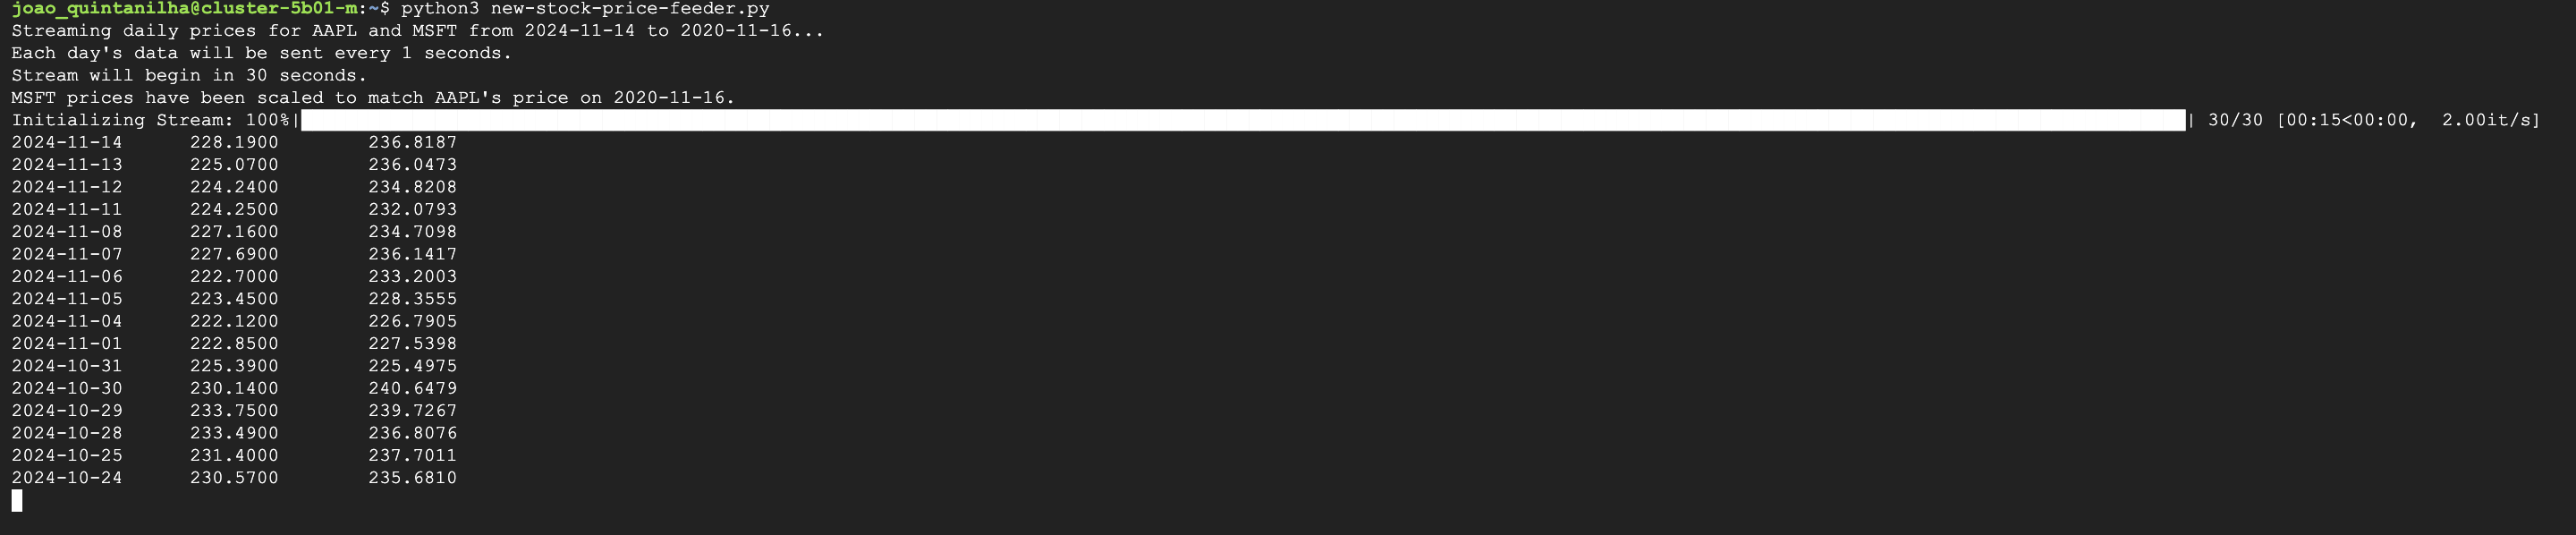

## Questions 11-14.

Here I attemped to create an algorithm that receives the inputs from the stock feeder, trying to identify the periods of saling and buying the product.


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg, window, expr, concat_ws, lit
from pyspark.sql.types import StructType, StructField, StringType, DoubleType

# Initialize the SparkSession
spark = SparkSession.builder.appName("StockPriceStreamingApp").getOrCreate()

# Define the schema for incoming stock price data
stock_schema = StructType([
    StructField("date", StringType(), True),
    StructField("aapl", DoubleType(), True),
    StructField("msft", DoubleType(), True)
])

# Configure streaming to read data from the socket
stock_stream = (
    spark.readStream.format("socket")
    .option("host", "localhost")
    .option("port", 9999)
    .load()
    .selectExpr("CAST(value AS STRING) as raw_data")
    .selectExpr(
        "split(raw_data, '\\t')[0] as date",
        "CAST(split(raw_data, '\\t')[1] AS DOUBLE) as aapl",
        "CAST(split(raw_data, '\\t')[2] AS DOUBLE) as msft"
    )
    .withColumn("date", col("date").cast("timestamp"))
)

# Function to calculate moving averages for a specific stock
def compute_moving_averages(data_stream, stock_col, ma_window):
    return (
        data_stream.withWatermark("date", "1 day")
        .groupBy(window("date", f"{ma_window} days").alias("time_window"))
        .agg(avg(stock_col).alias(f"{stock_col}_{ma_window}day"))
        .select(col("time_window.start").alias("start"), f"{stock_col}_{ma_window}day")
    )

# Separate streams for AAPL and MSFT
aapl_prices = stock_stream.select("date", "aapl")
msft_prices = stock_stream.select("date", "msft")

# Compute moving averages for AAPL
aapl_10day_avg = compute_moving_averages(aapl_prices, "aapl", 10)
aapl_40day_avg = compute_moving_averages(aapl_prices, "aapl", 40)

# Compute moving averages for MSFT
msft_10day_avg = compute_moving_averages(msft_prices, "msft", 10)
msft_40day_avg = compute_moving_averages(msft_prices, "msft", 40)

# Generate buy/sell signals based on moving averages
def detect_signals(short_ma, long_ma, symbol):
    return (
        short_ma.join(long_ma, "start")
        .withColumn(
            "signal",
            expr(
                f"CASE WHEN {symbol}_10day > {symbol}_40day THEN 'buy' "
                f"WHEN {symbol}_10day < {symbol}_40day THEN 'sell' "
                "END"
            )
        )
        .withColumn("symbol", lit(symbol.upper()))
        .withColumn("latest_price", col(f"{symbol}_10day"))
        .select("start", "symbol", "signal", "latest_price")
        .filter(col("signal").isNotNull())
    )

# Detect signals for AAPL and MSFT
aapl_signals = detect_signals(aapl_10day_avg, aapl_40day_avg, "aapl")
msft_signals = detect_signals(msft_10day_avg, msft_40day_avg, "msft")

# Merge the two signal streams
trading_signals = aapl_signals.union(msft_signals)

# Write the output to the console in the desired format
query = (
    trading_signals.writeStream
    .outputMode("append")
    .format("console")
    .option("truncate", False)
    .start()
)

# Wait for the stream to finish
query.awaitTermination()

Although I believe my rationale to achieve it is working now, I kept receiving hundreds of lines of errors and limitations of storage of Spark in my Google Cloud Platform. The same issue was presented when I tried to run this in the Halligan Machines. The following command was not properly receiving the updates sent to the listener terminal:

`nc -lk localhost 9999 | python3 -m trader`


In order to navigate through this adversity, I tried to validate my code trying to run the algorithmic logic via a Jupyter Notebook, which gave me the following code:

In [3]:
import pandas as pd
import numpy as np

# Load data
apple_stock_data = pd.read_csv('AAPL_4_years_data.csv', parse_dates=['datetime'])
microsoft_stock_data = pd.read_csv('MSFT_4_years_data.csv', parse_dates=['datetime'])

# Sort by datetime
apple_stock_data.sort_values(by='datetime', inplace=True)
microsoft_stock_data.sort_values(by='datetime', inplace=True)

# Scale Microsoft's closing prices to match Apple's most recent closing price
scale_factor = apple_stock_data.iloc[-1]['close'] / microsoft_stock_data.iloc[-1]['close']
microsoft_stock_data['close'] *= scale_factor

# Add suffixes to distinguish between the two datasets
apple_stock_data = apple_stock_data.add_suffix('_aapl')
microsoft_stock_data = microsoft_stock_data.add_suffix('_msft')

# Merge datasets on datetime
merged_data = pd.merge(
    apple_stock_data,
    microsoft_stock_data,
    left_on='datetime_aapl',
    right_on='datetime_msft',
    how='inner'
)

# Drop duplicate datetime columns and rename for clarity
merged_data['datetime'] = merged_data['datetime_aapl']
merged_data.drop(['datetime_aapl', 'datetime_msft'], axis=1, inplace=True)

# Function to calculate moving averages
def calculate_moving_average(data, window):
    return data.rolling(window=window).mean()

# Initialize results list
signals = []

# Process data line by line
merged_data['10_day_ma_aapl'] = calculate_moving_average(merged_data['close_aapl'], 10)
merged_data['40_day_ma_aapl'] = calculate_moving_average(merged_data['close_aapl'], 40)
merged_data['10_day_ma_msft'] = calculate_moving_average(merged_data['close_msft'], 10)
merged_data['40_day_ma_msft'] = calculate_moving_average(merged_data['close_msft'], 40)

# Detect buy and sell signals
for i in range(1, len(merged_data)):
    # Check Apple signals
    if (
        merged_data.iloc[i - 1]['10_day_ma_aapl'] <= merged_data.iloc[i - 1]['40_day_ma_aapl'] and
        merged_data.iloc[i]['10_day_ma_aapl'] > merged_data.iloc[i]['40_day_ma_aapl']
    ):
        signals.append((merged_data.iloc[i]['datetime'], 'AAPL', 'buy'))
    elif (
        merged_data.iloc[i - 1]['10_day_ma_aapl'] >= merged_data.iloc[i - 1]['40_day_ma_aapl'] and
        merged_data.iloc[i]['10_day_ma_aapl'] < merged_data.iloc[i]['40_day_ma_aapl']
    ):
        signals.append((merged_data.iloc[i]['datetime'], 'AAPL', 'sell'))

    # Check Microsoft signals
    if (
        merged_data.iloc[i - 1]['10_day_ma_msft'] <= merged_data.iloc[i - 1]['40_day_ma_msft'] and
        merged_data.iloc[i]['10_day_ma_msft'] > merged_data.iloc[i]['40_day_ma_msft']
    ):
        signals.append((merged_data.iloc[i]['datetime'], 'MSFT', 'buy'))
    elif (
        merged_data.iloc[i - 1]['10_day_ma_msft'] >= merged_data.iloc[i - 1]['40_day_ma_msft'] and
        merged_data.iloc[i]['10_day_ma_msft'] < merged_data.iloc[i]['40_day_ma_msft']
    ):
        signals.append((merged_data.iloc[i]['datetime'], 'MSFT', 'sell'))

# Create a DataFrame for the results
signals_df = pd.DataFrame(signals, columns=["datetime", "symbol", "signal"])

# Print the head of the results
print(signals_df.head(10).to_string(index=False))


           datetime symbol signal
2020-11-17 13:00:00   AAPL    buy
2020-11-17 15:45:00   AAPL   sell
2020-11-19 15:00:00   MSFT    buy
2020-11-20 09:30:00   AAPL    buy
2020-11-20 13:30:00   AAPL   sell
2020-11-20 15:00:00   MSFT   sell
2020-11-24 11:00:00   MSFT    buy
2020-11-24 12:45:00   AAPL    buy
2020-11-30 10:30:00   MSFT   sell
2020-12-01 10:15:00   MSFT    buy


Ultimately, this sample above is what I would expected to obtain by exploring Spark.
<br><br><br><br><br><br><br><br><br><br><br><br><br><br>.


In [7]:
! apt-get install -y pandoc

! apt-get install -y texlive-xetex texlive-fonts-recommended texlive-plain-generic


! jupyter nbconvert --to pdf "/content/drive/MyDrive/Colab Notebooks/hw7.ipynb"

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pandoc is already the newest version (2.9.2.1-3ubuntu2).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
texlive-fonts-recommended is already the newest version (2021.20220204-1).
texlive-plain-generic is already the newest version (2021.20220204-1).
texlive-xetex is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/hw7.ipynb to pdf
[NbConvertApp] Support files will be in hw7_files/
[NbConvertApp] Making directory ./hw7_files
[NbConvertApp] Writing 104078 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConv

The code was slightly modified to be inserted on this Notebook, including only 5 iterations.